# Introduction


## Challenge Large Scale Machine Learning

### Authors: 
#### Kevin Elgui (kevin.elgui@gmail.com), Pascal Bianchi



### Geolocation challenge

The goal of this challenge is to develop a system which tries to perform a geolocation of connected devices within an IoT Network.

The challenge will have two phases. Please read the below information carefully.

In the first phase of the challenge, you will be provided a training dataset which contains the raw messages and their corresponding coordinates. We will also provide you a validation dataset, which only contains the raw messages. The labes of the validation set will not be provided. In this phase, you will train your system based on this data and the ranking in the challenge webpage will be based on your score obtained on the validation data.

The second phase of the challenge will start only a couple of hours before the deadline. Within this period, we will provide you the test set. You will need to run the algorithm that you developed on the first phase on this dataset and submit your predictions to the challenge webpage. Your final ranks will be determined on this dataset. Note that this phase will only last a couple of hours, which means that you will not be able to tune your algorithm on this dataset.

# The properties of the dataset:


### Training data:


The training set contains raw messages (lines) and their labels (GPS-position). There are ?? messages in this dataset. Each message is of size 1 x 20, where 20 is the number of message descriptors. For each message there is a label, a couple (latitude, longitude). 

### Validation data:



The validation set only contains raw messages. There are ?? messages in this dataset, where the format is the same as before. The labels of this dataset will not be provided. Within the first phase, your ranks will be calculated based on this dataset.

### Test data:


The test set only contains raw messages as well. There will be ?? messages in this dataset, the format is always the same. The labels of this dataset will not be provided either. This dataset will be provided only in the second phase: only a couple of hours before the challenge deadline. Your final ranks will be calculated based on this dataset.

## The performance criterion¶

The question of a suitable criterion for evaluation is tough. In practice, in order to suit industrial requirements, we evaluate your prediction throught the 90% quantile of the error vector, which is computed as follows:
$$ error = d_V(pred, true),$$ where $d_V$ is the Vincenty distance between to GPS-coordinates. Finally:

$$ criterion =  error_{(90\%)}$$
In other words, this criterion corresponds to the max error distance made by your model on $90\%$ of the test set.
The lower the score, the better the performance.

# Training Data

Raw messages: lien_to_raw_messages_train

GPS-coordinates: lien_to_label_train

# Validation Data 

Raw messages: lien_to_raw_messages_val

# Example submission

In [1]:
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
# from geopy.distance import vincenty

In [2]:
# adding utils to path to use scripts
os.chdir('..') ; sys.path.append(os.getcwd())
# sys.path.append('../..')

print(sys.path, os.getcwd())

['', '/home/valou/anaconda3/lib/python36.zip', '/home/valou/anaconda3/lib/python3.6', '/home/valou/anaconda3/lib/python3.6/lib-dynload', '/home/valou/Documents/télécom/3a/IA317-large_scale_ML/Projet_IA317/geolocenv/lib/python3.6/site-packages', '/home/valou/Documents/télécom/3a/IA317-large_scale_ML/Projet_IA317/geolocenv/lib/python3.6/site-packages/IPython/extensions', '/home/valou/.ipython', '/home/valou/Documents/télécom/3a/IA317-large_scale_ML/Projet_IA317'] /home/valou/Documents/télécom/3a/IA317-large_scale_ML/Projet_IA317


## Loading and investigate the data

In [58]:
train_messages_fname = '../Data/Train/db_train.csv'
assert(os.path.exists(train_messages_fname))
train_labels_fname = '../Data/Train/label_train.csv'
assert(os.path.exists(train_labels_fname))
val_messages_fname  = '../Data/Validation/db_val.csv'
assert(os.path.exists(val_messages_fname))
val_labels_fname = '../Data/Validation/label_val.csv'

train_messages_df = pd.read_csv(train_messages_fname, sep=';', low_memory=False)
train_labels_df = pd.read_csv(train_labels__fname, sep=';', low_memory=False)

train_messages_fname.head()


AssertionError: 

### Data Visualization (requires bokeh)


In [3]:
from bokeh.io import output_notebook

In [7]:
## If you have bokeh installed, you can uncomment the last commands. 


from utils.plot_map import PlotMap
# PlotMap(train_labels_df)
PlotMap(toy_labels)

## Example prediction

In the following, we will train a simple regressor on toy data.

In [3]:
toy_data = pd.read_csv('data/Toy/db_toy.csv', sep=';')
toy_labels = pd.read_csv('data/Toy/labels_toy.csv', sep=';', usecols=['latitude', 'longitude'] )

### Features selection

In this example, we propose a simple feature matrix $X$ such that :

$$\begin{cases} X[i,j] &= 1 &\text{ if the $j^{th}$ basestation received the $i^{th}$ message}, \\
 X[i,j] &= 0, &\text{otherwise}. \end{cases} $$

For the project, you are free to chose other parameters for your model.

In [15]:
toy_data.head()

,messageid,latitude,longitude,did,did_hex,time_msg,time_ux,time_ux_client,motion,speed,...,radius,datepart,seqnumber,dtid,nseq,rssi,bsid_hex,bsid,snr,freq
0,5a4b36a612f1431c0bbcfe5a,49.150979,2.584248,2158065,20EDF1,2018-01-02 07:37:10,1514878630000,1514878240000,t,127.0,...,NaN,2018-01-02,536,5491a93b9336908c3b1b4c70,0,-139,F4B,3915,11.740000,868136469
1,5a4b36a612f1431c0bbcfe5a,49.150979,2.584248,2158065,20EDF1,2018-01-02 07:37:10,1514878630000,1514878240000,t,127.0,...,NaN,2018-01-02,536,5491a93b9336908c3b1b4c70,0,-137,33B8,13240,13.980000,868137053
2,5a4b36a612f1431c0bbcfe5a,49.150979,2.584248,2158065,20EDF1,2018-01-02 07:37:10,1514878630000,1514878240000,t,127.0,...,NaN,2018-01-02,536,5491a93b9336908c3b1b4c70,0,-125,33C1,13249,26.580000,868136944
3,5a4b370f12f1431c0bbda371,49.368966,2.647366,5140063,4E6E5F,2018-01-02 07:38:55,1514878735000,1514878300000,f,0.0,...,NaN,2018-01-02,3581,5491a93b9336908c3b1b4c70,0,-139,2AE9,10985,12.210000,868109404
4,5a4b3958e541cd714dedf24b,49.244820,3.094714,2154347,20DF6B,2018-01-02 07:48:40,1514879320000,1514879320000,f,0.0,...,NaN,2018-01-02,3922,5491a93b9336908c3b1b4c70,0,-100,461,1121,51.560001,868188574


In [4]:
## Please run the cell
## --------------------

features_of_interest = {"features_of_interest": ["rssi"],
"target":["latitude", "longitude"]}

dict_of_gby = {'rssi': ['bsid'],
                'freq': ['bsid'],
                'latitude_bs': ['bsid'],
                'longitude_bs': ['bsid'],
                'latitude': [''],
                'longitude': [''],
                'speed': [''],
                'dtid': [''], 
                'did': [''],
              }

In [5]:
%%time
from utils.features_builder import _build_features_dict, my_parser
(feature_dict, feature_name), (target_dict, target_name)  = _build_features_dict(toy_data, features_of_interest)
res = my_parser(toy_data, toy_labels, feature_dict, target_dict, features_of_interest)
X = pd.DataFrame(res['X'].toarray(), columns=res['dict_X'])
y = pd.DataFrame(res['y'].toarray(), columns=res['dict_y'])



Features of interest:  ['rssi']  
Target:  ['latitude', 'longitude']  
Nb of base stations:  12  
Nb of unique DeviceId train:  318 
CPU times: user 16.5 s, sys: 268 ms, total: 16.7 s
Wall time: 16.6 s


In [16]:
X.head()

,rssi3915,rssi15623,rssi2293,rssi13249,rssi2849,rssi13240,rssi17121,rssi1121,rssi10985,rssi8442,rssi10744,rssi1241
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,0


### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from utils.evaluation import vincenty_df, vincenty_vec, criterion, plot_error

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)  

pred = pd.DataFrame(reg.predict(X_test), columns=res['dict_y'])

In [11]:
print('The criterion on the testing data : %.2f km' % criterion(pred, y_test, True))

# np.savetxt('data/Toy/pred_toy.txt', pred.values)

The criterion on the testing data : 24.61 km


/home/valou/Documents/télécom/3a/IA317-large_scale_ML/Projet_IA317/geolocenv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


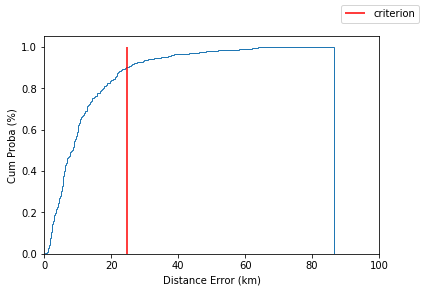

In [12]:
plot_error(pred, y_test, True)

#### Remark: 
The criterion is about 20 km. It's huge ! 

### Notation 
After having upload your file pred_test.txt on the server, you will be ranked w.r.t the criterion. 
The score which is assigned to you is computed on half of the test set. This corresponds to the public score. 
On the other half, you are assigned a private score. 

Your final score will take into account these two scores. Thus, your final rank may differ slightly from the one you see on the leader board.

#### Now it's your turn. Good luck !  :) 